# ДЗ № 3
# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


### Загрузка датасета

In [2]:
(X_train, y_train),(X_test, y_test) = boston_housing.load_data()

### Описание датасета

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 * CRIM     per capita crime rate by town
 * ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 * INDUS    proportion of non-retail business acres per town
 * CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 * NOX      nitric oxides concentration (parts per 10 million)
 * RM       average number of rooms per dwelling
 * AGE      proportion of owner-occupied units built prior to 1940
 * DIS      weighted distances to five Boston employment centres
 * RAD      index of accessibility to radial highways
 * TAX      full-value property-tax rate per $10,000
 * PTRATIO  pupil-teacher ratio by town
 * B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 * LSTAT    \% lower status of the population
 * MEDV     Median value of owner-occupied homes in \$1000's

### Масштабирование признаков
Все признаки отмасштабируем в диапазоне значений от -1 до 1

In [3]:
scaler = MinMaxScaler((-1,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('X_train_scaled.shape', X_train_scaled.shape)
print('X_test_scaled.shape ', X_test_scaled.shape)

X_train_scaled.shape (404, 13)
X_test_scaled.shape  (102, 13)


* 404 примера в тренировочной выборке
* 102 примера в тестовой выборке
* 13 признаков

# Модель 1
* активации линейные
* функция потерь - среднеквадратичная ошибка
* метрика - - среднеквадратичная ошибка
* 10 эпох по 1 примеру в батче

In [4]:
model = Sequential([
    Dense(20, activation='linear', input_shape=(13,)),
    Dense(20, activation='linear'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

print(model.summary())

history = model.fit( X_train_scaled, y_train,
  epochs=10,
  batch_size=1, validation_split=0.2
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
323/323 [==============================] - 0s 1ms/step - loss: 173.6848 - mean_squared_error: 173.6848 - val_loss: 67.0245 - val_mean_squared_error: 67.0245
Epoch 2/10
323/323 [==============================] - 0s 1ms/step - loss: 46.6713 - mean_squared_error: 46.6713 - val_loss: 49.7527 - val_mean_squared_error: 49.7527
Epoch 3/10
323/323 [=============================

Text(0.5, 1.0, 'History - MSE')

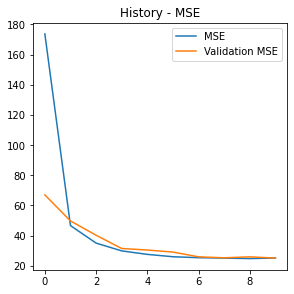

In [5]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.legend()
plt.title('History - MSE')

Среднеквадратическая ошибка на тренировке и валидации очень быстро сходятся.
### Коэффициент детерминации на предсказании тестовой выборки

In [6]:
y_test_pred = model.predict(X_test_scaled)
r2_score(y_test, y_test_pred)

0.7234360979213637

# Модель 2
* Изменили активации: swish - комбинирует линейную функцию и нелинейный сигмоид, relu - выдает результат только в положительной области, поэтому используем его в выходном нейроне, так как цена на недвижимость неотрицательна.
* Скорректировали количетсво нейронов в слоях
* Функция потерь - средняя абсолютная ошибка
* метрика - ско 
* 30 эпох, по 1 примеру в батче

In [7]:
model_2 = Sequential([
    Dense(20, activation='swish', input_shape=(13,)),
    Dense(13, activation='swish'),
    Dense(1, activation='relu')
])

model_2.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_squared_error'])

print(model_2.summary())

history_2 = model_2.fit( X_train_scaled, y_train,
  epochs=30,
  batch_size=1, validation_split=0.2
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_4 (Dense)              (None, 13)                273       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 14        
Total params: 567
Trainable params: 567
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
323/323 [==============================] - 0s 1ms/step - loss: 13.3795 - mean_squared_error: 296.6262 - val_loss: 6.5015 - val_mean_squared_error: 93.7100
Epoch 2/30
323/323 [==============================] - 0s 945us/step - loss: 5.4503 - mean_squared_error: 68.0930 - val_loss: 5.4728 - val_mean_squared_error: 66.5927
Epoch 3/30
323/323 [=============================

Text(0.5, 1.0, 'History - MSE')

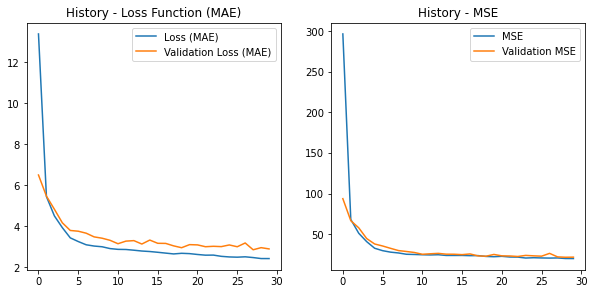

In [8]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history_2.history['loss'], label='Loss (MAE)')
plt.plot(history_2.history['val_loss'], label='Validation Loss (MAE)')
plt.legend()
plt.title('History - Loss Function (MAE)')

plt.subplot(2, 2, 2)
plt.plot(history_2.history['mean_squared_error'], label='MSE')
plt.plot(history_2.history['val_mean_squared_error'], label='Validation MSE')
plt.legend()
plt.title('History - MSE')

### Коэф детерминации

In [9]:
y_test_pred_2 = model_2.predict(X_test_scaled)
r2_score(y_test, y_test_pred_2)

0.8330083443827824

#### R2_SCORE увеличился с 0.72 до 0.83, причем настраеваемых параметров уменшилось с 721 до 567

# Задание 2

константный тензор 2 на 3

In [10]:
import tensorflow as tf
a = tf.constant(np.array([[1, 2, 3], [4, 5, 6]]))
a

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

транспонирование

In [11]:
aT = tf.linalg.matrix_transpose(a)
aT

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 4],
       [2, 5],
       [3, 6]])>

матричное умножение

In [12]:
aaT = tf.matmul(aT, a)
aaT

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[17, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])>

среднее по строкам

In [13]:
mean_axis_0 = tf.math.reduce_mean(aaT,0)
mean_axis_0

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([22, 29, 36])>

генерация тензора с нормально распределнными значениями. 2 матрицы содержащие по 3 квадратных матриц 4 на 4

In [14]:
norm = tf.random.normal((2,3,4,4))
print(norm.numpy())

[[[[-0.09941783 -0.53285414 -0.38473317 -0.38245597]
   [-0.15274416 -0.2954573  -0.28799698 -1.610002  ]
   [ 0.3101198  -0.4202418   1.1608038   0.5852391 ]
   [-0.11921384  1.3762654   0.9833069   0.10879694]]

  [[-0.681533    1.8113422   1.4480939  -1.8774385 ]
   [ 0.4811193  -0.77832735 -0.9578261  -0.2098246 ]
   [ 0.823184    0.07283982  0.6298453   0.08050122]
   [-1.8051207   0.89088917  0.10060136  0.5261252 ]]

  [[-0.38895515 -0.9934301  -0.42741394 -1.0772336 ]
   [ 1.8196852  -0.56058586 -0.08199504  0.07040004]
   [-1.9064597   0.73749864 -0.08805317 -0.39283967]
   [ 0.07806669  1.754789    1.3315437  -2.0512807 ]]]


 [[[ 1.8381231  -0.9215058  -1.3514049  -0.11944367]
   [-0.4711475   0.0166174  -0.12411705 -0.20238827]
   [ 0.53261995 -1.2392235   0.46346775 -0.21477269]
   [ 0.29743174 -0.13605078 -0.89404076 -2.1707704 ]]

  [[-0.30060208  0.56073135  0.48486376  0.77961284]
   [ 1.6708025   0.92893064  1.1421708  -2.369309  ]
   [ 0.67631984  0.5561035   1.85771

Определители квадратных матриц (которые 4 на 4)

In [15]:
dets = tf.linalg.det(norm)
dets

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.34093794, -0.6147548 ,  2.36278   ],
       [ 2.326182  , -0.5041827 ,  1.019334  ]], dtype=float32)>